In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [30]:
x , Y = make_regression(n_samples=100, n_features=1, noise=10)

In [31]:
Y.shape
Y = Y.reshape(100,-1)
Y.shape

(100, 1)

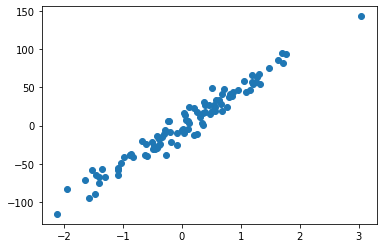

In [32]:
plt.scatter(x, Y)

In [33]:
X = np.hstack((x , np.ones(x.shape)))

In [34]:
X[:10].shape

(10, 2)

In [35]:
theta = np.random.randn(2,1)
theta

array([[-1.12526944],
       [-1.01234482]])

In [36]:
def model_function(theta,x):
    return x.dot(theta)

In [37]:
model = model_function(theta, X)
model.shape

(100, 1)

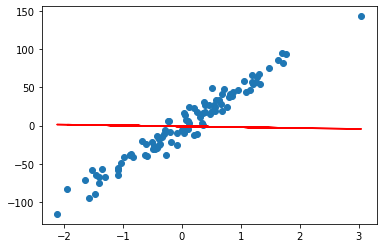

In [38]:
plt.plot(x, model, c='r')
plt.scatter(x, Y)

In [39]:
# loss_function
def cost_function(theta, x, y):
    m = x.shape[0]
    return 1/(2*m) * np.sum((x.dot(theta) - y)**2)

In [40]:
cost_function(theta ,X ,Y)

1147.1617727687694

In [41]:
def grad(theta , X, y):
    m = X.shape[0]
    #print(X.dot(theta).shape,Y.shape)
    #sys.exit(0)
    return 1/m * X.T.dot(X.dot(theta) - y)

In [42]:
grad(theta , X ,Y)

array([[-43.89101131],
       [ -2.9532171 ]])

In [43]:
def descent_grad(theta, X , Y ,learning_rate=0.1 , n_iteration=40):
    history_learning = np.zeros(40)
    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(theta,X ,Y)
        history_learning[i] = cost_function(theta , X, Y)
    return theta, history_learning

In [44]:
final_theta , history = descent_grad(theta, X , Y)

In [45]:
history.shape

(40,)

In [46]:
pred = model_function(final_theta, X)

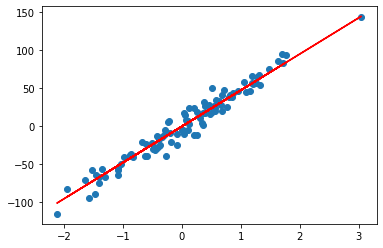

In [47]:
plt.scatter(x , Y)
plt.plot(x, pred, c='r')

Text(0, 0.5, 'los_funtion (MSE)')

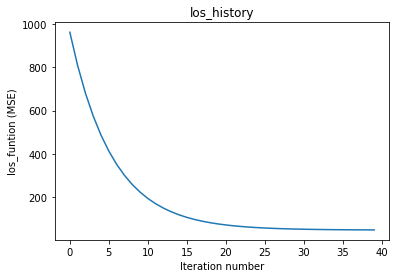

In [48]:
plt.plot(range(0,40), history)
plt.title('los_history')
plt.xlabel('Iteration number')
plt.ylabel('los_funtion (MSE)')